* [Description des données](#dd)
* [Elimination de quelques variables non pertinentes](#ev)
* [Nettoyage](#ne)
* [Choix de la variable cible (émissions de CO2)](#cv)
* [Analyse exploratoire](#ae)

In [1]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

# Description des données <a class="anchor" id="dd"></a>

In [2]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
df.shape

(3376, 46)

In [4]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [5]:
df['YearBuilt'].unique()

array([1927, 1996, 1969, 1926, 1980, 1999, 1904, 1910, 1998, 1928, 1922,
       2004, 1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1955, 1978,
       1949, 1989, 1906, 1994, 1992, 1990, 1950, 1900, 1954, 1911, 1973,
       1920, 1982, 1908, 1959, 2000, 1997, 1962, 1970, 2008, 1948, 1965,
       1929, 2010, 1938, 1986, 2002, 1923, 2003, 1957, 1964, 1941, 1963,
       2006, 1915, 1958, 2009, 2011, 1971, 2007, 1951, 1953, 1952, 1960,
       1937, 1966, 1968, 1925, 1924, 2005, 1909, 1931, 1972, 1914, 1913,
       1917, 1995, 1981, 1976, 1988, 1979, 1947, 1984, 1956, 1912, 1977,
       1921, 1945, 1974, 1975, 1946, 1967, 1987, 1940, 1932, 1993, 1918,
       1905, 1902, 1939, 1944, 1942, 1903, 2012, 2013, 2015, 1901, 1919,
       2014, 1936, 1935], dtype=int64)

In [6]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [7]:
#batiments non destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [8]:
df.shape # la taille passe de (3376, 46) à (1668, 46)

(1668, 46)

In [9]:
#'GHGEmissionsIntensity',TotalGHGEmissions
#'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'

# Elimination de quelques variables non pertinentes<a class="anchor" id="ev"></a>

In [10]:
#variables pas trop pertinentes pour le projet
#df['DataYear'].unique()#il s'agit d'une seule année du coup on va éliminer ce champ des variables à retenir
#DataYear, PrimaryPropertyType,PropertyName,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode
df=df.loc[:, ~df.columns.isin(['DataYear','PrimaryPropertyType','PropertyName','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode'])]

In [11]:
df.shape

(1668, 40)

<AxesSubplot:>

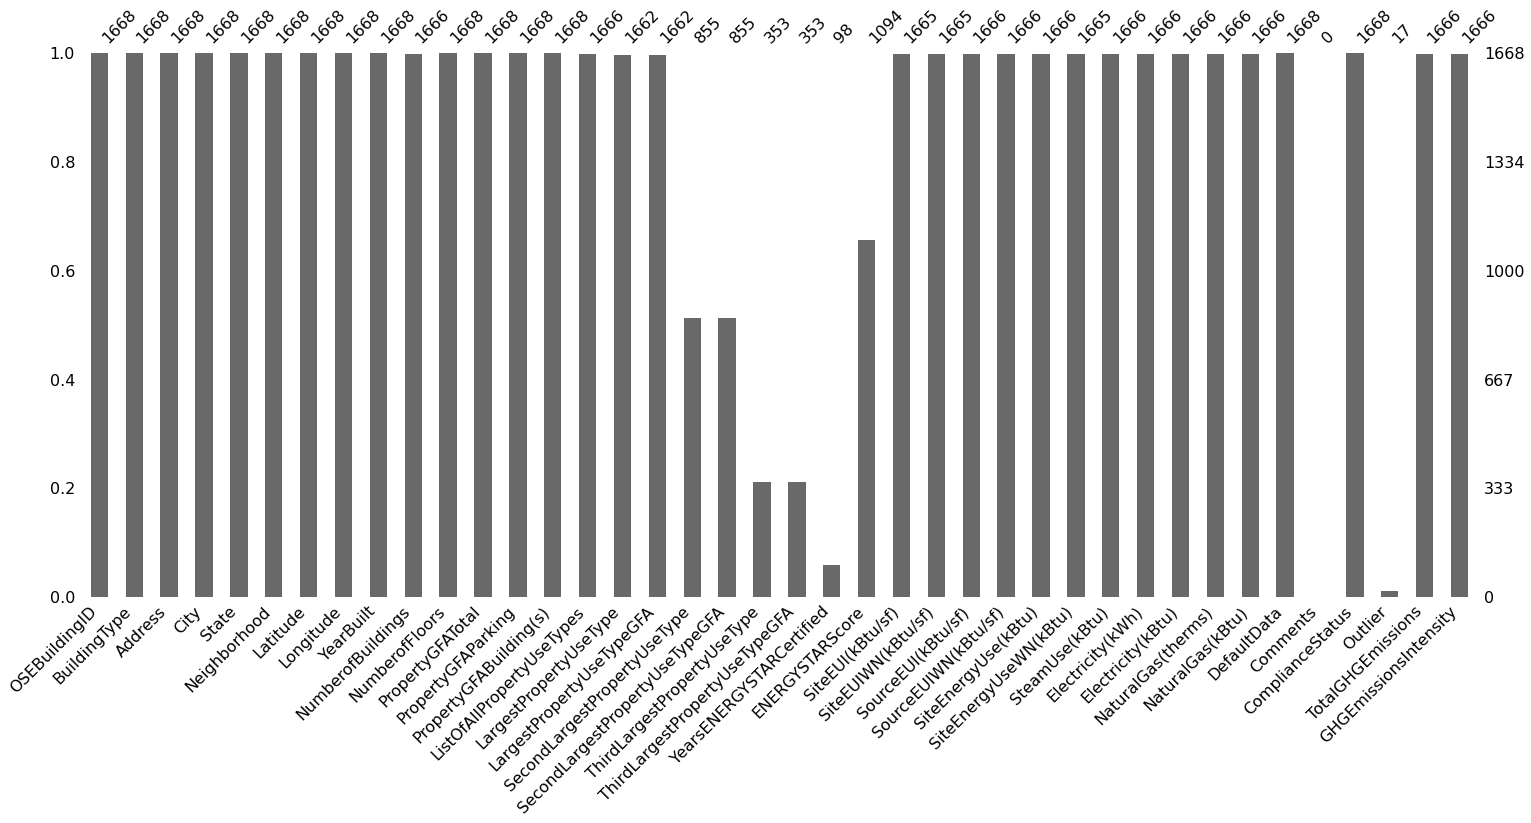

In [12]:
msno.bar(df)

In [13]:

df.dtypes

OSEBuildingID                        int64
BuildingType                        object
Address                             object
City                                object
State                               object
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

In [14]:
df.describe()

OSEBuildingID     Latitude    Longitude    YearBuilt  \
count    1668.000000  1668.000000  1668.000000  1668.000000   
mean    16336.346523    47.616054  -122.332908  1961.913669   
std     13835.292512     0.048168     0.024580    32.741755   
min         1.000000    47.499170  -122.411820  1900.000000   
25%       582.750000    47.585458  -122.343280  1930.000000   
50%     21143.500000    47.612340  -122.332935  1965.000000   
75%     24602.250000    47.649675  -122.321675  1989.000000   
max     50226.000000    47.733870  -122.258640  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1666.000000     1668.000000      1.668000e+03   
mean            1.168667        4.121103      1.188427e+05   
std             2.931409        6.563407      2.973622e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.947775e+04   
50%             1.000000        2.000000      4.928950e+04   
75%             1.000000        4.000000      1.053250e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1668.000000            1.668000e+03               1.662000e+03   
mean         12897.979017            1.059447e+05               9.876469e+04   
std          42274.511185            2.842116e+05               2.767111e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.847525e+04               2.552750e+04   
50%              0.000000            4.739150e+04               4.377050e+04   
75%              0.000000            9.475975e+04               9.198375e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       ...  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count  ...         1.666000e+03           1.665000e+03    1.666000e+03   
mean   ...         8.437933e+06           8.064790e+06    5.125726e+05   
std    ...         3.024380e+07           2.203878e+07    5.513944e+06   
min    ...         0.000000e+00           0.000000e+00    0.000000e+00   
25%    ...         1.229291e+06           1.294615e+06    0.000000e+00   
50%    ...         2.554947e+06           2.685146e+06    0.000000e+00   
75%    ...         6.913348e+06           7.109712e+06    0.000000e+00   
max    ...         8.739237e+08           4.716139e+08    1.349435e+08   

       Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
count      1.666000e+03       1.666000e+03        1.666000e+03   
mean       1.712630e+06       5.843493e+06        1.970845e+04   
std        6.095172e+06       2.079673e+07        9.370814e+04   
min       -3.382680e+04      -1.154170e+05        0.000000e+00   
25%        2.114083e+05       7.213255e+05        0.000000e+00   
50%        4.724153e+05       1.611881e+06        4.982630e+03   
75%        1.420747e+06       4.847589e+06        1.520000e+04   
max        1.925775e+08       6.570744e+08        2.979090e+06   

       NaturalGas(kBtu)  Comments  TotalGHGEmissions  GHGEmissionsIntensity  
count      1.666000e+03       0.0        1666.000000            1666.000000  
mean       1.970845e+06       NaN         184.973301               1.607845  
std        9.370814e+06       NaN         751.976001               2.336882  
min        0.000000e+00       NaN          -0.800000              -0.020000  
25%        0.000000e+00       NaN          19.967500               0.350000  
50%        4.982630e+05       NaN          49.580000               0.880000  
75%        1.520000e+06       NaN         142.382500               1.890000  
max        2.979090e+08       NaN       16870.980000              34.090000  

[8 rows x 27 columns]

# Nettoyage<a class="anchor" id="ne"></a>

**Note**<br>
TotalGHGEmissions,GHGEmissionsIntensity, Electricity(kBtu) et Electricity(kWh)  contiennenet des valeurs négatives.On va les remplacer par 0.

In [15]:
num = df._get_numeric_data()
num[num < 0] = 0
df.describe()

OSEBuildingID     Latitude  Longitude    YearBuilt  NumberofBuildings  \
count    1668.000000  1668.000000     1668.0  1668.000000        1666.000000   
mean    16336.346523    47.616054        0.0  1961.913669           1.168667   
std     13835.292512     0.048168        0.0    32.741755           2.931409   
min         1.000000    47.499170        0.0  1900.000000           0.000000   
25%       582.750000    47.585458        0.0  1930.000000           1.000000   
50%     21143.500000    47.612340        0.0  1965.000000           1.000000   
75%     24602.250000    47.649675        0.0  1989.000000           1.000000   
max     50226.000000    47.733870        0.0  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1668.000000      1.668000e+03         1668.000000   
mean         4.121103      1.188427e+05        12897.979017   
std          6.563407      2.973622e+05        42274.511185   
min          0.000000      1.128500e+04            0.000000   
25%          1.000000      2.947775e+04            0.000000   
50%          2.000000      4.928950e+04            0.000000   
75%          4.000000      1.053250e+05            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ...  \
count            1.668000e+03               1.662000e+03  ...   
mean             1.059447e+05               9.876469e+04  ...   
std              2.842116e+05               2.767111e+05  ...   
min              3.636000e+03               5.656000e+03  ...   
25%              2.847525e+04               2.552750e+04  ...   
50%              4.739150e+04               4.377050e+04  ...   
75%              9.475975e+04               9.198375e+04  ...   
max              9.320156e+06               9.320156e+06  ...   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count         1.666000e+03           1.665000e+03    1.666000e+03   
mean          8.437933e+06           8.064790e+06    5.125726e+05   
std           3.024380e+07           2.203878e+07    5.513944e+06   
min           0.000000e+00           0.000000e+00    0.000000e+00   
25%           1.229291e+06           1.294615e+06    0.000000e+00   
50%           2.554947e+06           2.685146e+06    0.000000e+00   
75%           6.913348e+06           7.109712e+06    0.000000e+00   
max           8.739237e+08           4.716139e+08    1.349435e+08   

       Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
count      1.666000e+03       1.666000e+03        1.666000e+03   
mean       1.712650e+06       5.843562e+06        1.970845e+04   
std        6.095166e+06       2.079671e+07        9.370814e+04   
min        0.000000e+00       0.000000e+00        0.000000e+00   
25%        2.114083e+05       7.213255e+05        0.000000e+00   
50%        4.724153e+05       1.611881e+06        4.982630e+03   
75%        1.420747e+06       4.847589e+06        1.520000e+04   
max        1.925775e+08       6.570744e+08        2.979090e+06   

       NaturalGas(kBtu)  Comments  TotalGHGEmissions  GHGEmissionsIntensity  
count      1.666000e+03       0.0        1666.000000            1666.000000  
mean       1.970845e+06       NaN         184.973782               1.607857  
std        9.370814e+06       NaN         751.975882               2.336874  
min        0.000000e+00       NaN           0.000000               0.000000  
25%        0.000000e+00       NaN          19.967500               0.350000  
50%        4.982630e+05       NaN          49.580000               0.880000  
75%        1.520000e+06       NaN         142.382500               1.890000  
max        2.979090e+08       NaN       16870.980000              34.090000  

[8 rows x 27 columns]

In [16]:
df['YearsENERGYSTARCertified'].unique()

array([nan, '2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2014201320112010200920082007', '2016201520142013',
       '2017201620152014201320112008', '201720162015201420132008',
       '20162015201320122010', '2015201320122010', '20162011201020092008',
       '2007', '2010', '20172016201520092008', '2017201320092008', '2015',
       '2017', '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '20

In [17]:
df['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [31]:
df=df[df['Outlier']!='High outlier']
df['Outlier'].unique()

array([nan, 'Low outlier'], dtype=object)

**Note**<br>
la variable 'YearsENERGYSTARCertified' contient des valeurs d'années concaténés.On ne va pas tenir compte de ce champ dans la suite

# Choix de la variable cible (émissions de CO2)<a class="anchor" id="cv"></a>

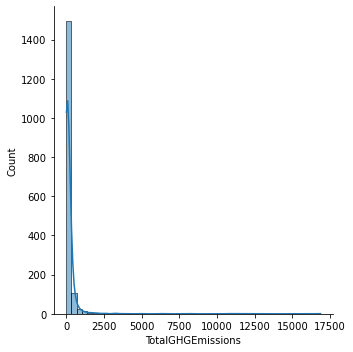

In [18]:
#Distribution de la variable cible
sns.displot(data=df,x='TotalGHGEmissions', bins=50,kde=True)

In [19]:
unique_TotalGHGEmissions=df['TotalGHGEmissions'].unique()
print(df['TotalGHGEmissions'].isnull().mean()*100,' valeurs non nulles')
print(len(unique_TotalGHGEmissions),' différents values\n')
print(len(unique_TotalGHGEmissions)*100/df.shape[0],'% différents values')

0.1199040767386091  valeurs non nulles
1594  différents values

95.56354916067146 % différents values


In [20]:
#descriptive statistics summary
df['TotalGHGEmissions'].describe()

count     1666.000000
mean       184.973782
std        751.975882
min          0.000000
25%         19.967500
50%         49.580000
75%        142.382500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [21]:
df['TotalGHGEmissions'].isnull().mean()*100

0.1199040767386091

In [22]:
#Nous partons du dataset dont les nutriscores sont complétés.
df=df[~df['TotalGHGEmissions'].isnull()]

In [23]:
df['TotalGHGEmissions'].isnull().mean()*100

0.0

# Analyse exploratoire <a class="anchor" id="ae"></a>

### Relation entre la variable cible et des variables numériques

In [24]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Address', 'City', 'State',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [25]:
num_cols = list(df.select_dtypes([np.number]).columns)
num_cols.remove('Comments')

print('\n***********************')
del num_cols[:3]
del num_cols[-2:]
print (num_cols)



***********************
['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']


In [26]:

def target_vs_num_variable(var,target='TotalGHGEmissions'):
    #scatter plot var/target
    data = pd.concat([df[target], df[var]], axis=1)
    data.plot.scatter(x=var, y=target);

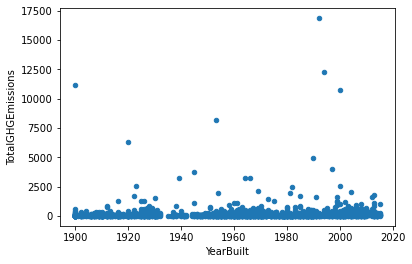

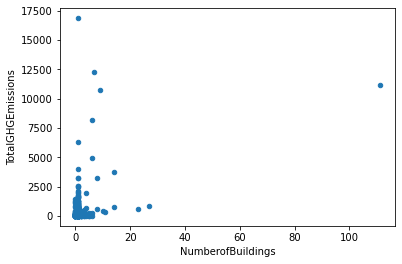

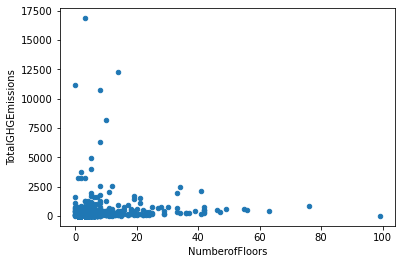

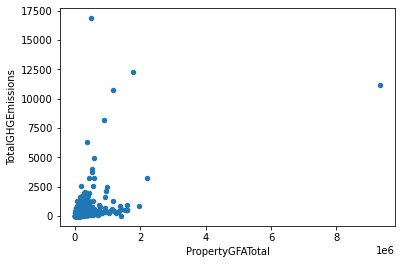

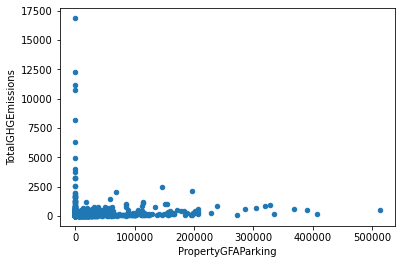

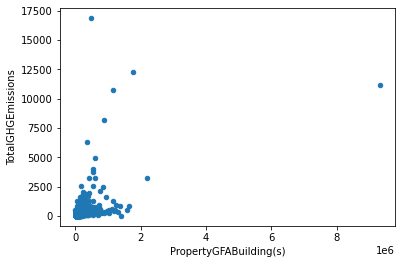

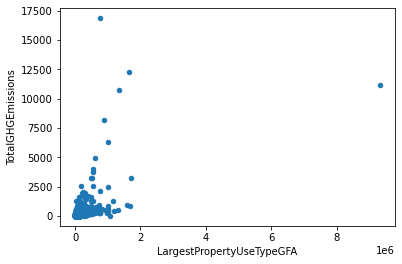

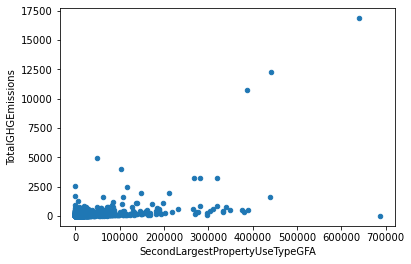

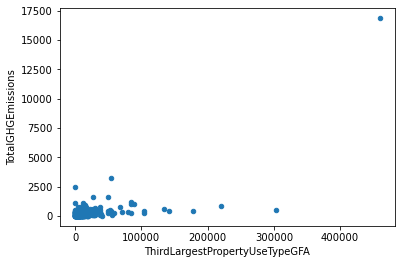

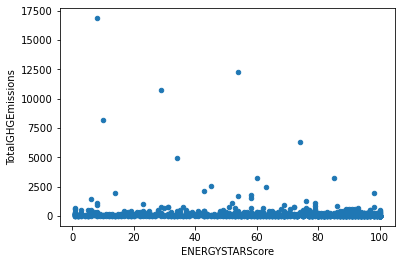

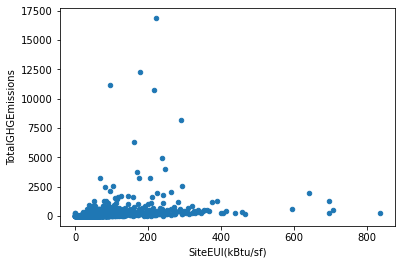

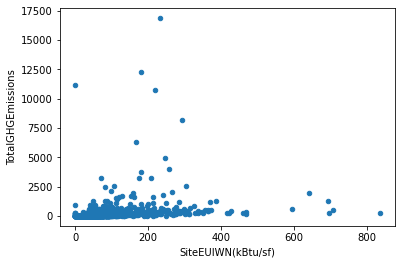

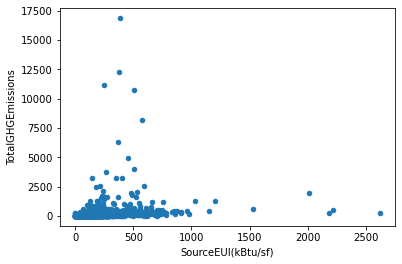

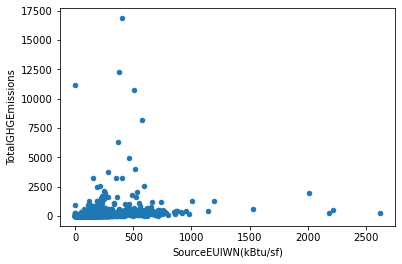

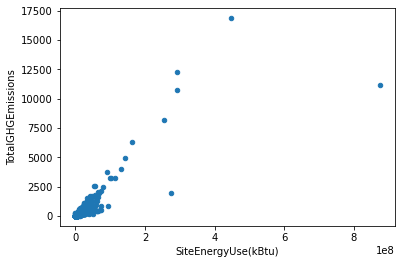

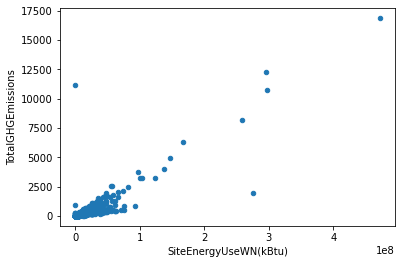

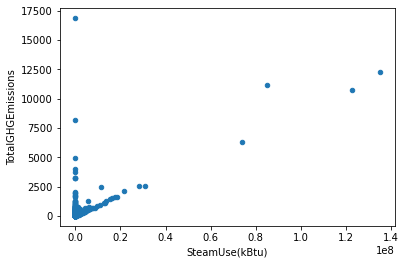

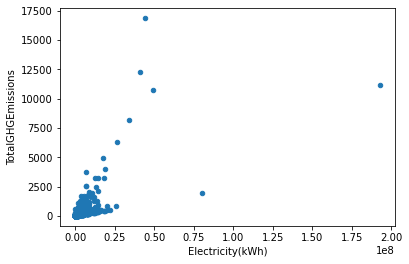

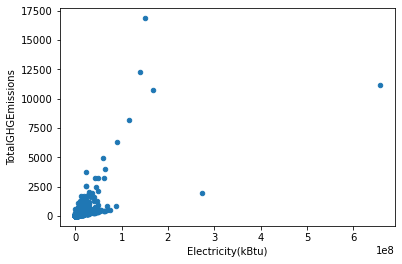

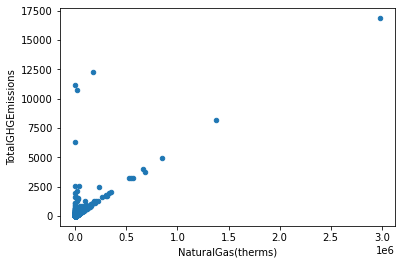

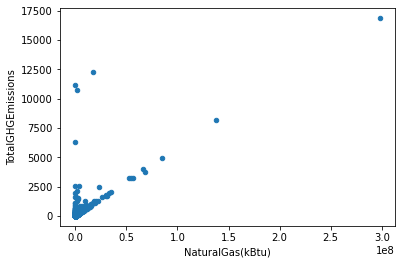

In [27]:
for nc in num_cols:
    target_vs_num_variable(nc,target='TotalGHGEmissions')
    

df.columns

**Interprétation**<br>
Il semble qu'il ya une relation linéaire entre la variable cible 'TotalGHGEmissions' et respectivement les variables suiavantes:<br>
'NumberofBuildings',
'PropertyGFATotal',
'PropertyGFABuilding(s)',
'LargestPropertyUseTypeGFA',
''SiteEnergyUse(kBtu)',
'SiteEnergyUseWN(kBtu)',
'Electricity(kWh)', 
'Electricity(kBtu)', 
'NaturalGas(therms)', 
'NaturalGas(kBtu)


### Corrélation


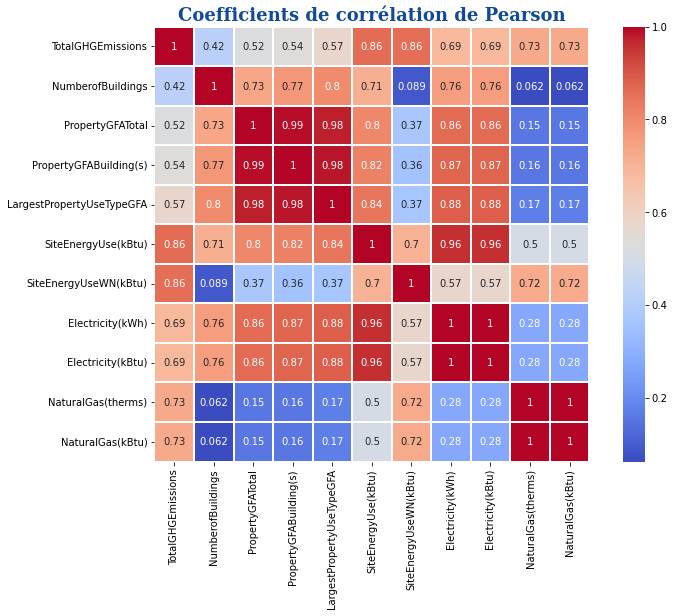

In [28]:
#look for correlated variables
fig=plt.figure(figsize=(12,8))
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }
corr_mat = df[['TotalGHGEmissions','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 
               'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
               'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']].corr()
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

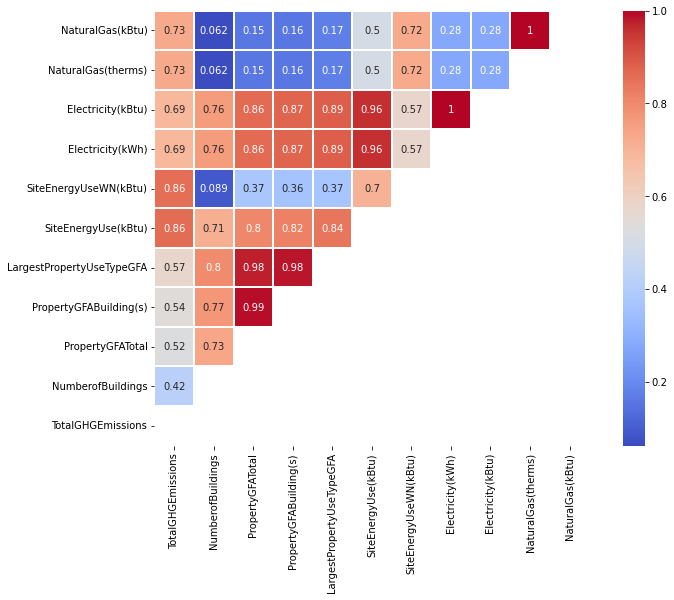

In [35]:
fig=plt.figure(figsize=(12,8))
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }
corr_mat = df[['TotalGHGEmissions','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 
               'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
               'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, mask=mask, square=True, linewidths=0.1, annot=True,cmap='coolwarm')
plt.xlim(0, corr_mat.shape[1])
plt.ylim(0, corr_mat.shape[0])
plt.show()

### Carte d'émission de CO2


In [41]:
m = folium.Map([42 ,29], zoom_start=5,width="%100",height="%100")
locations = list(zip(df.Latitude, df.Longitude))
cluster = plugins.MarkerCluster(locations=locations,                     
               popups=df["TotalGHGEmissions"].tolist())  
m.add_child(cluster)
m

In [37]:
import folium

In [40]:
from folium import plugins

In [42]:
    #define Mexico's geolocation coordinates
    mexico_latitude = 23.6345 
    mexico_longitude = -102.5528

    # define the world map centered around Canada with a higher zoom level
    mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=6, tiles='Stamen Terrain')

    # display world map
    mexico_map

In [43]:
world_map = folium.Map()
world_map

In [44]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()


In [48]:
df_co=df[['Latitude','Longitude','TotalGHGEmissions']]

In [51]:
map = folium.Map(location=[df_co.Latitude.mean(), df_co.Longitude.mean()], zoom_start=14, control_scale=True)

In [52]:
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_co.Latitude, df_co.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
map.add_child(incidents)

In [ ]:
def map_per_indicator(INDICATOR,column_name):
    data=world.merge(data_years_filtered_indicators, left_on = 'iso_a3', right_on = 'Country Code')#check the occurrence
    map_data=data[data['Indicator Name']==INDICATOR]
    ax = map_data.plot(column=column_name, cmap ='YlGnBu', figsize=(15,9),scheme='quantiles', legend =True)
    map_title=column_name+' of '+INDICATOR+' by country'
    ax.set_title(map_title, fontdict={'fontsize': '15', 'fontweight' : '3'})#remove axes
    ax.set_axis_off()#move legend to an empty space
    ax.get_legend().set_bbox_to_anchor((.12,.12))
    fig=ax.get_figure()
    #save figure
    map_name='GeoMaps_'+column_name+'\Map of '+column_name +'of ' +INDICATOR+'.png'
    fig.savefig(map_name, dpi=100)